<a href="https://colab.research.google.com/github/githubberst/sg-recipe-recommender/blob/main/notebooks_and_data/4_train_yolov8_object_detection_on_custom_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Before you start
(from Roboflow's tutorial notebook)

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Wed Aug  2 14:56:42 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
# Path to the folder in Google Drive to save the results
HOME = "/content/drive/MyDrive/MyCapstone"

print(HOME)

/content/drive/MyDrive/MyCapstone


## Install YOLOv8
(from Roboflow's tutorial notebook)

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **27.01.2023** with version **YOLOv8.0.20**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [ ]:
# Pip install method (recommended)
!pip install ultralytics==8.0.134

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.0/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics
(from Roboflow's tutorial notebook)


If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Preparing custom ingredient images dataset






In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="your_key_here")
project = rf.workspace("ingredients-bloos").project("ingredient-detection")
dataset = project.version(4).download("yolov8")

mkdir: cannot create directory ‘/content/drive/MyDrive/MyCapstone/datasets’: File exists
/content/drive/MyDrive/MyCapstone/datasets
loading Roboflow workspace...
loading Roboflow project...

Extracting Dataset Version Zip to ingredient-detection-4 in yolov8:: 100%|██████████| 31076/31076 [02:56<00:00, 176.36it/s]


## Custom Training

In [ ]:
%cd {HOME}
!yolo task=detect mode=train resume data={dataset.location}/data.yaml model='runs/detect/train7/weights/last.pt'
#!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=30 imgsz=640 plots=True

/content/drive/MyDrive/MyCapstone
New https://pypi.org/project/ultralytics/8.0.146 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=runs/detect/train7/weights/last.pt, data=/content/drive/MyDrive/MyCapstone/datasets/ingredient-detection-4/data.yaml, epochs=30, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sho

In [ ]:
!ls {HOME}/runs/detect/train7/

args.yaml					     train_batch0.jpg
confusion_matrix_normalized.png			     train_batch16480.jpg
confusion_matrix.png				     train_batch16481.jpg
events.out.tfevents.1690962670.edac17fa124d.25574.0  train_batch16482.jpg
events.out.tfevents.1690990093.f43880e8a977.72851.0  train_batch1.jpg
F1_curve.png					     train_batch2.jpg
labels_correlogram.jpg				     val_batch0_labels.jpg
labels.jpg					     val_batch0_pred.jpg
P_curve.png					     val_batch1_labels.jpg
PR_curve.png					     val_batch1_pred.jpg
R_curve.png					     val_batch2_labels.jpg
results.csv					     val_batch2_pred.jpg
results.png					     weights


/content/drive/MyDrive/MyCapstone


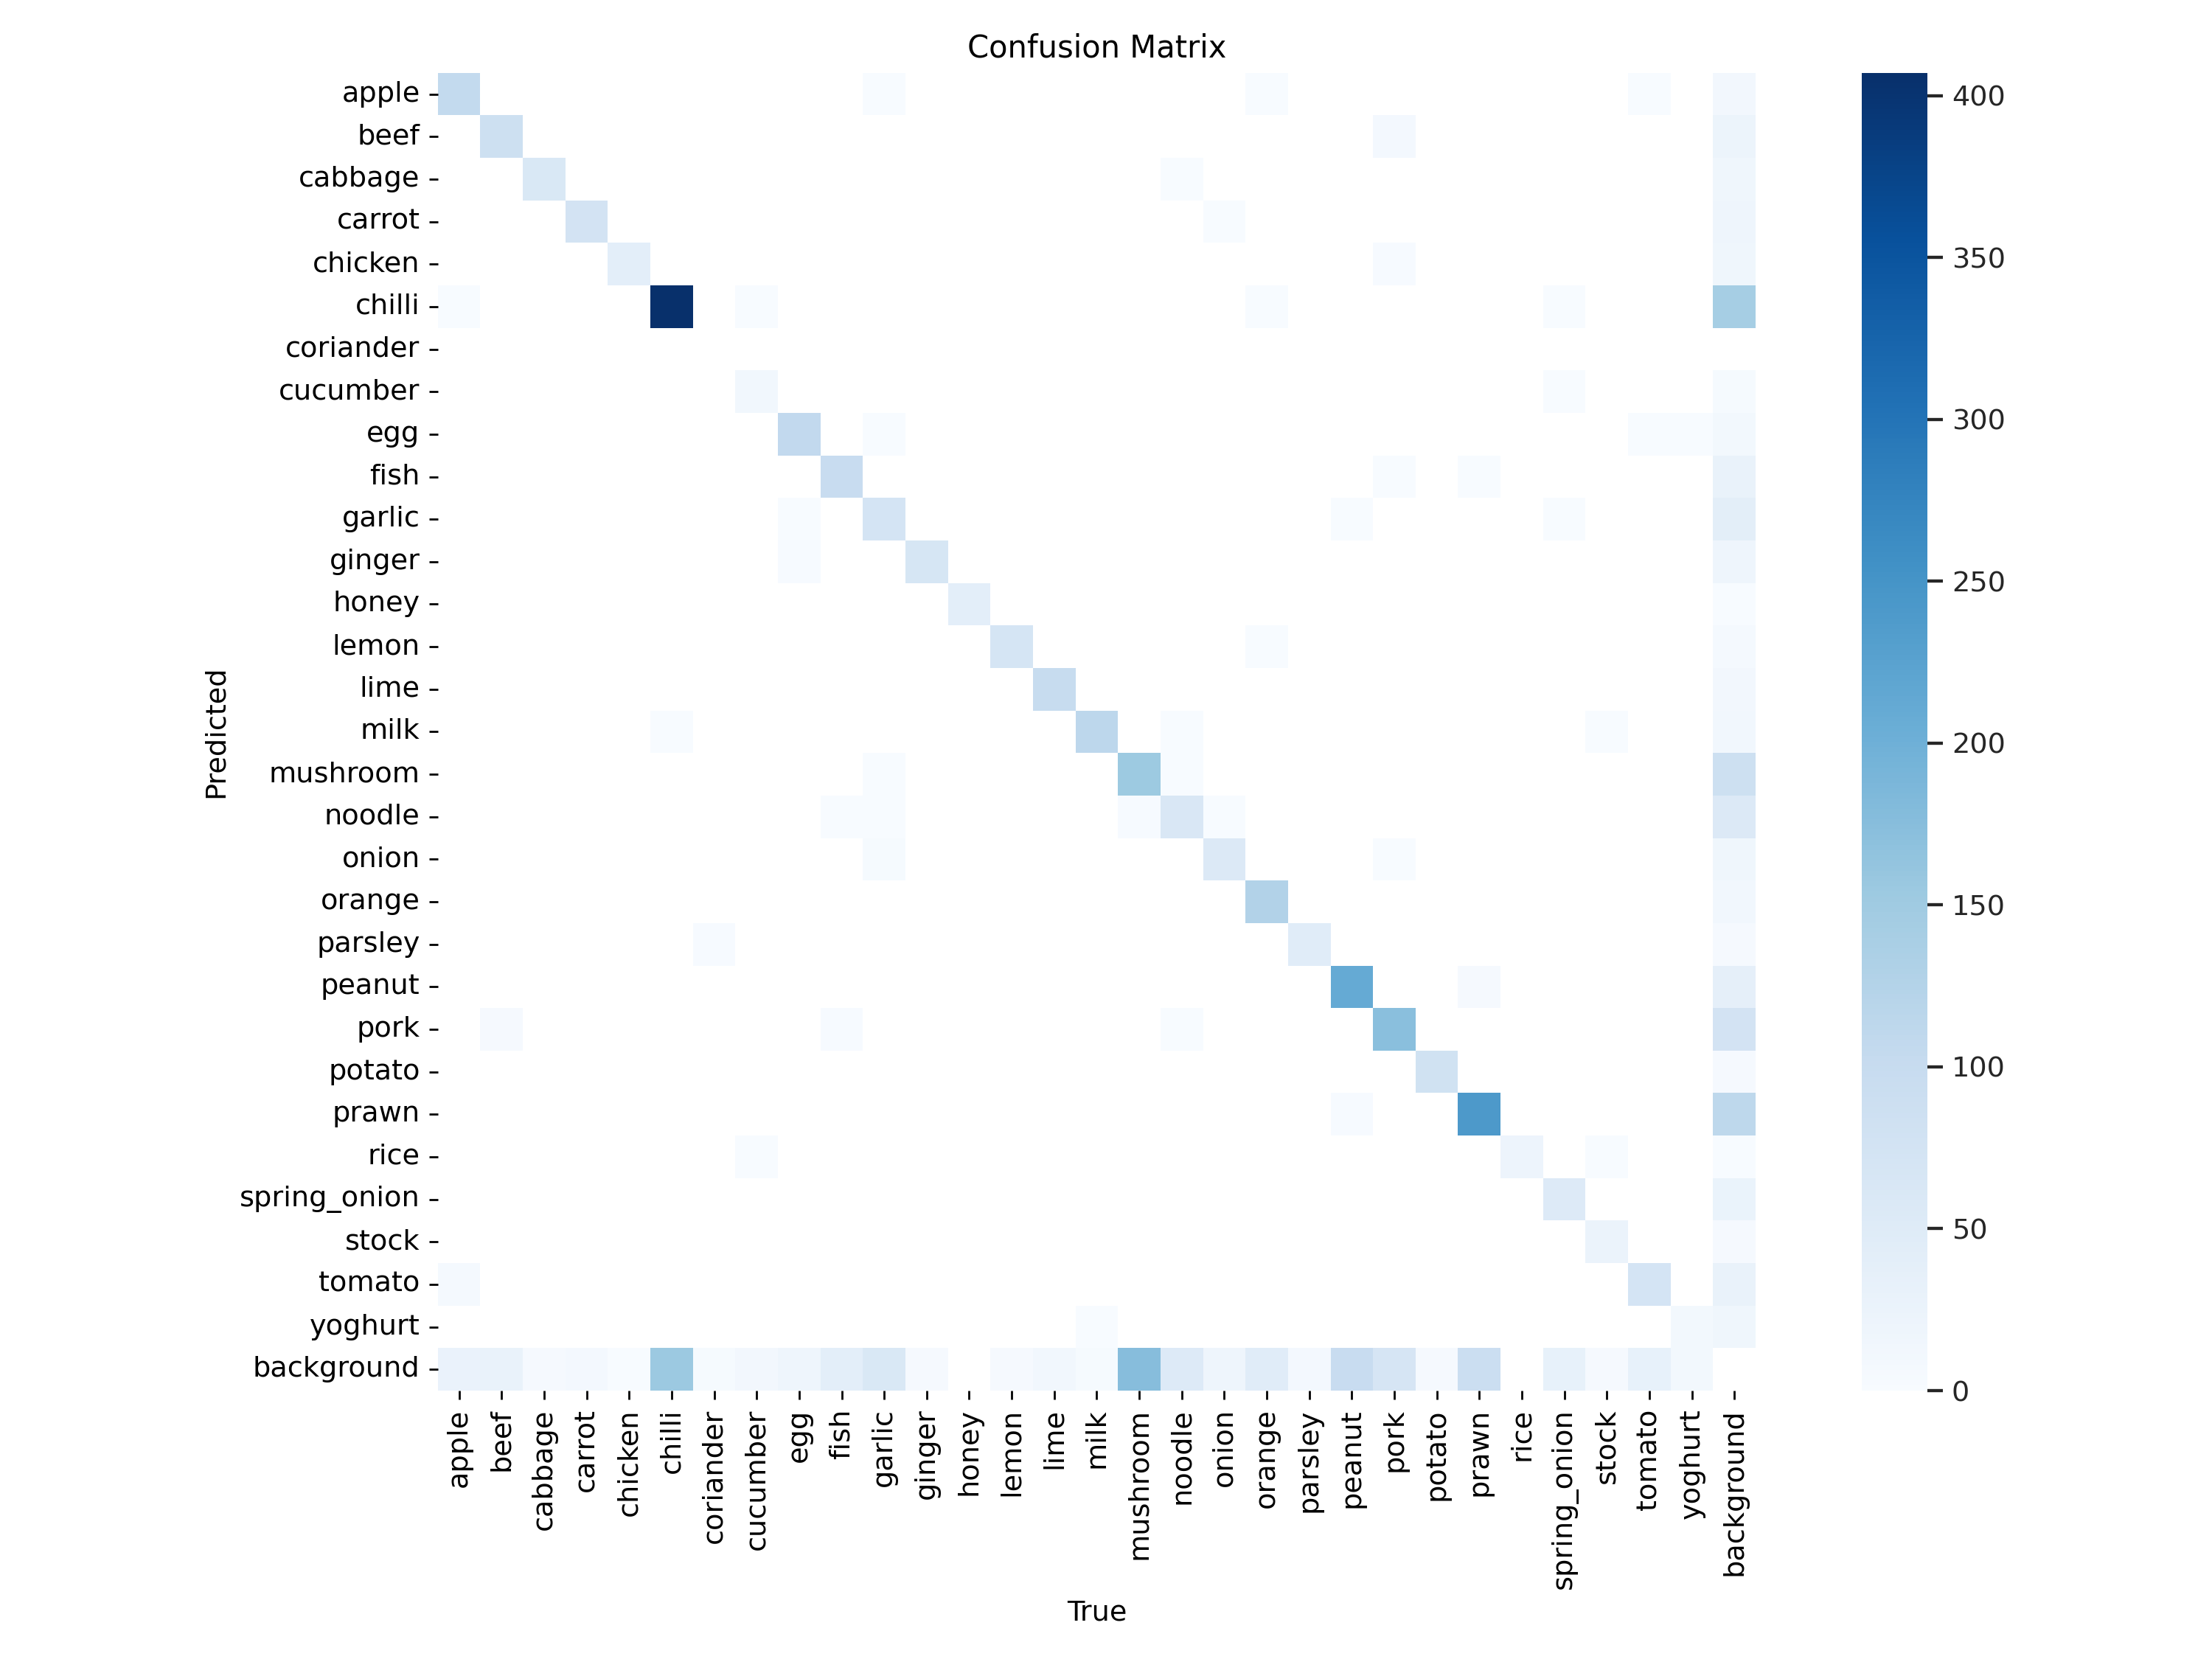

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train7/confusion_matrix.png', width=600)

/content/drive/MyDrive/MyCapstone


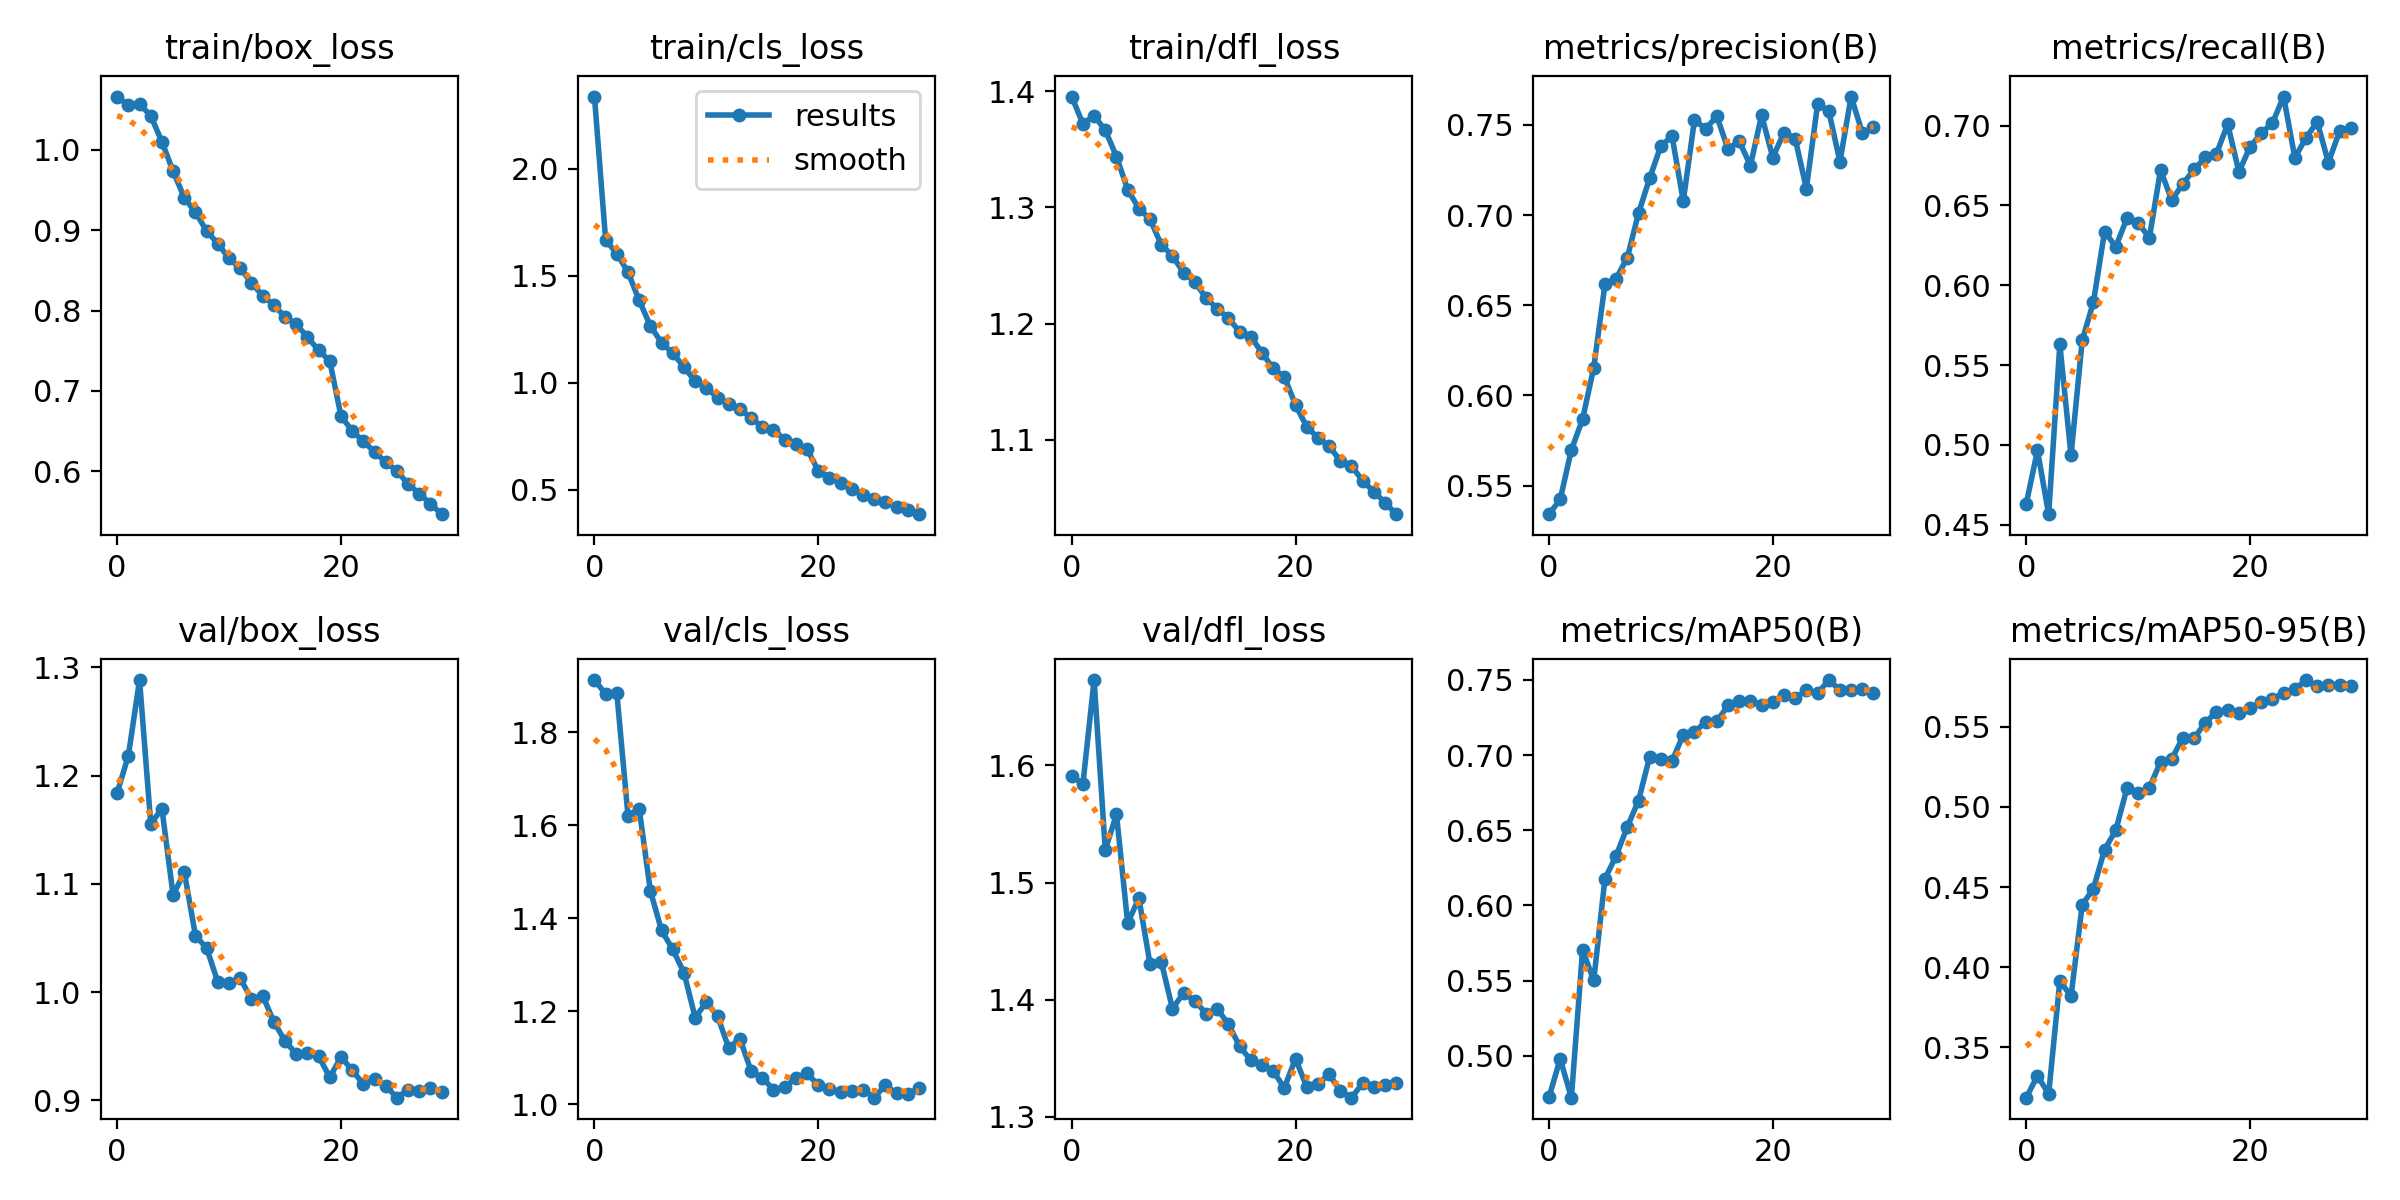

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train7/results.png', width=600)

/content/drive/MyDrive/MyCapstone


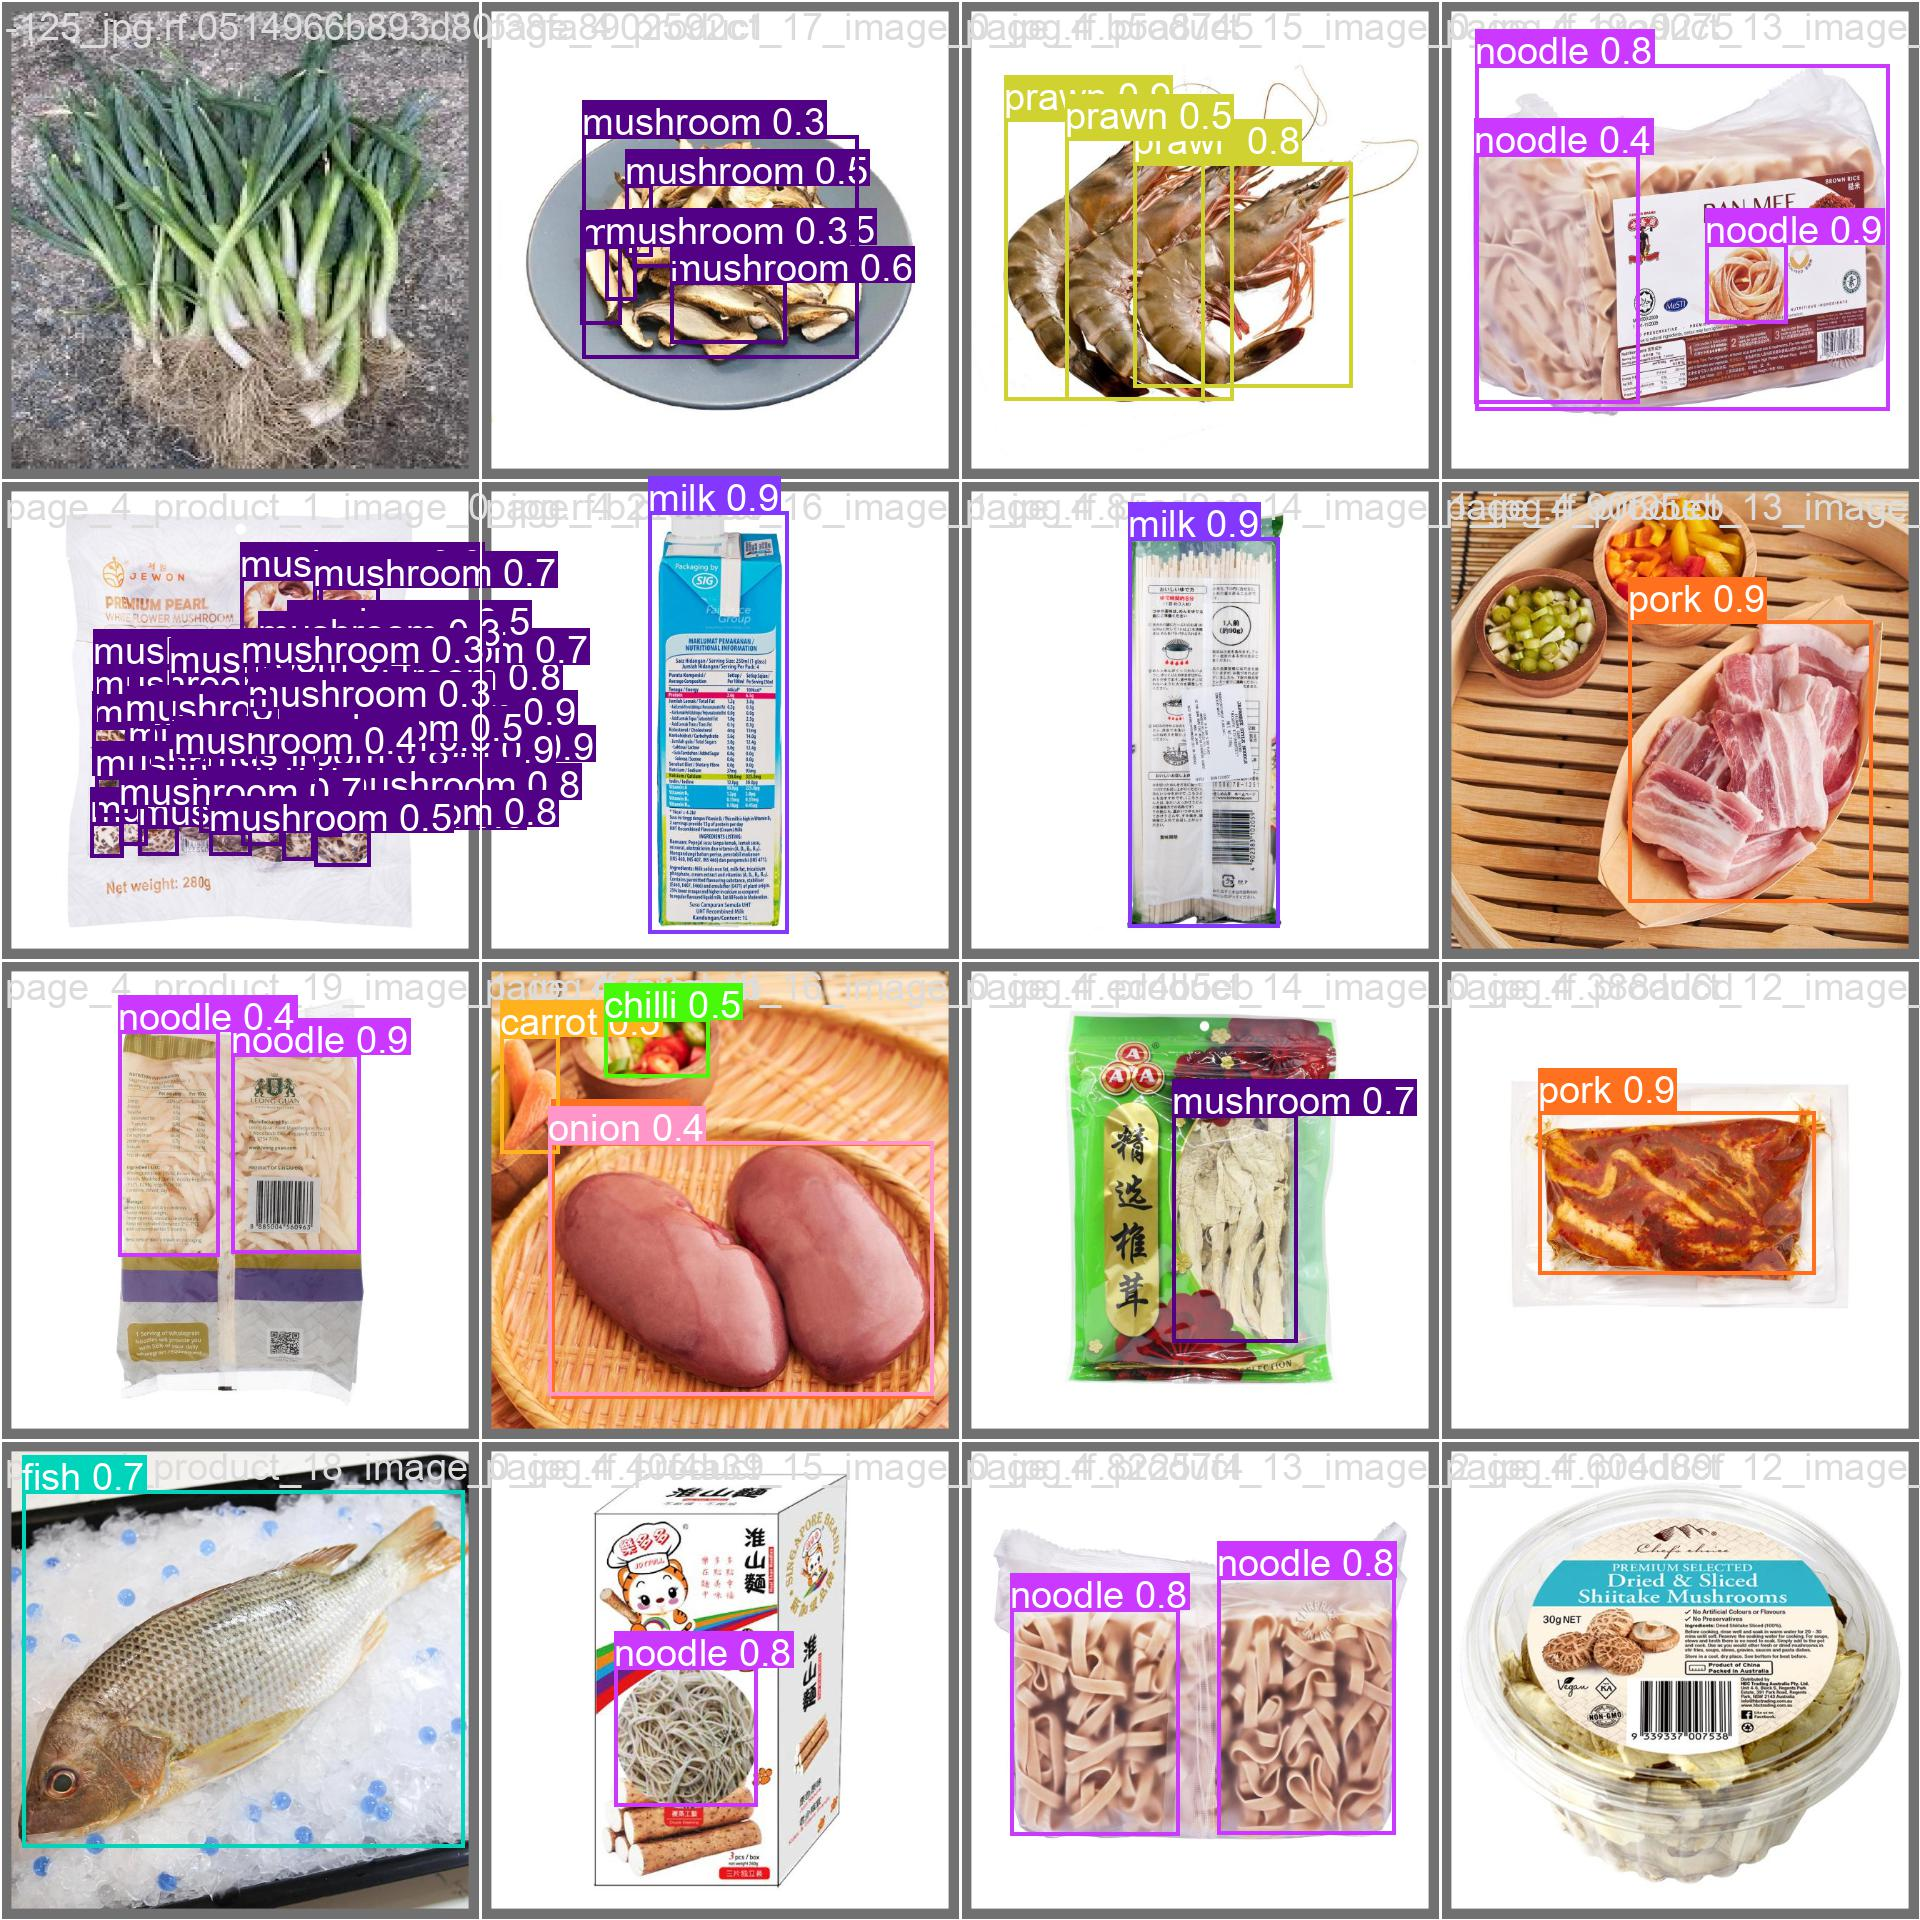

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train7/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train7/weights/best.pt data={dataset.location}/data.yaml

/content/drive/MyDrive/MyCapstone
Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25857130 parameters, 0 gradients
val: Scanning /content/drive/MyDrive/MyCapstone/datasets/ingredient-detection-4/valid/labels.cache... 1636 images, 48 backgrounds, 0 corrupt: 100% 1636/1636 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1587, len(boxes) = 3905. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 103/103 [00:47<00:00,  2.16it/s]
                   all       1636       3905      0.758      0.692       0.75      0.579
                 apple       1636        141      0.863      0.718      0.823      0.568
                  beef       1636        122      0.777 

## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train7/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content/drive/MyDrive/MyCapstone
Ultralytics YOLOv8.0.134 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25857130 parameters, 0 gradients

image 1/716 /content/drive/MyDrive/MyCapstone/datasets/ingredient-detection-4/test/images/-2023-01-12-174028_jpg.rf.f5b4662f44ef57434b76c75ec4b53759.jpg: 640x640 3 porks, 1 tomato, 39.4ms
image 2/716 /content/drive/MyDrive/MyCapstone/datasets/ingredient-detection-4/test/images/-2023-01-12-174107_jpg.rf.a3a56d31206817d74dc84060a069be8f.jpg: 640x640 1 pork, 36.4ms
image 3/716 /content/drive/MyDrive/MyCapstone/datasets/ingredient-detection-4/test/images/-2023-01-12-174501_jpg.rf.f9fcb1b4ef132faaa6829d964122552f.jpg: 640x640 3 porks, 36.4ms
image 4/716 /content/drive/MyDrive/MyCapstone/datasets/ingredient-detection-4/test/images/-2023-01-12-175035_jpg.rf.1c8d2e31b5a3c7d668d21811401f3301.jpg: 640x640 1 onion, 12 porks, 36.4ms
image 5/716 /content/drive/MyDrive/MyCapstone/datasets/ingredient-detection-4/

**NOTE:** Let's take a look at few results.

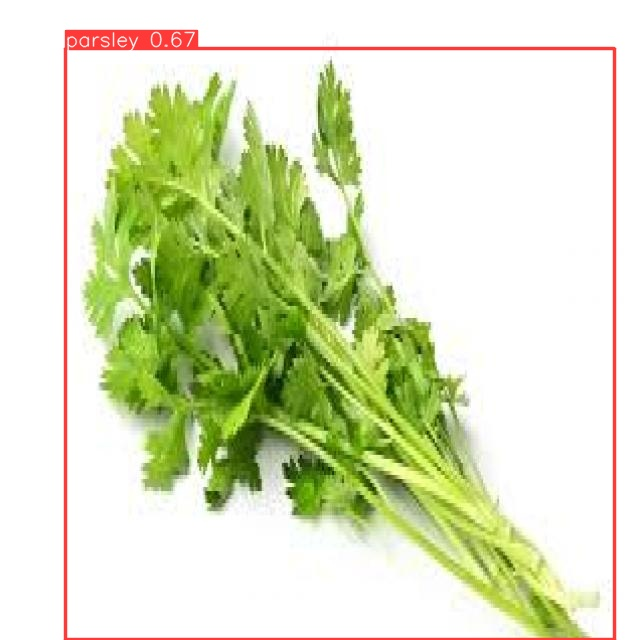

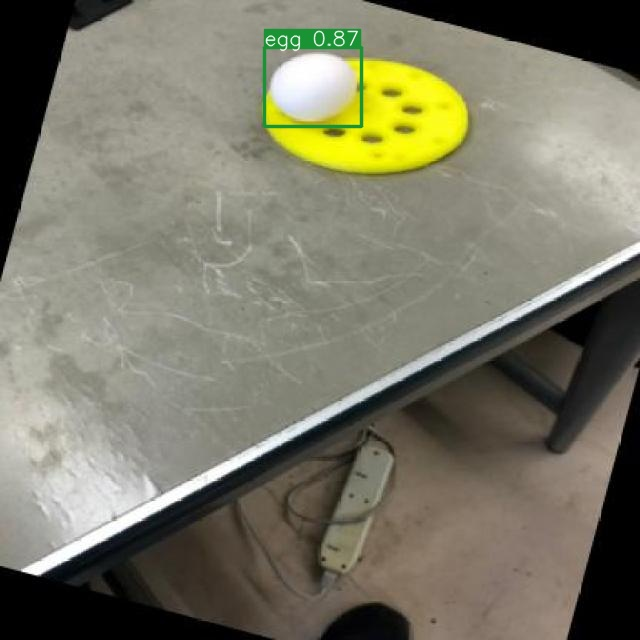

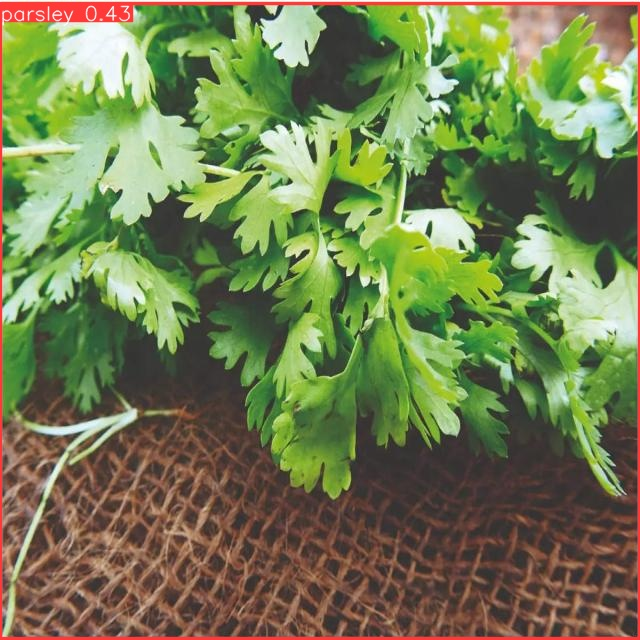

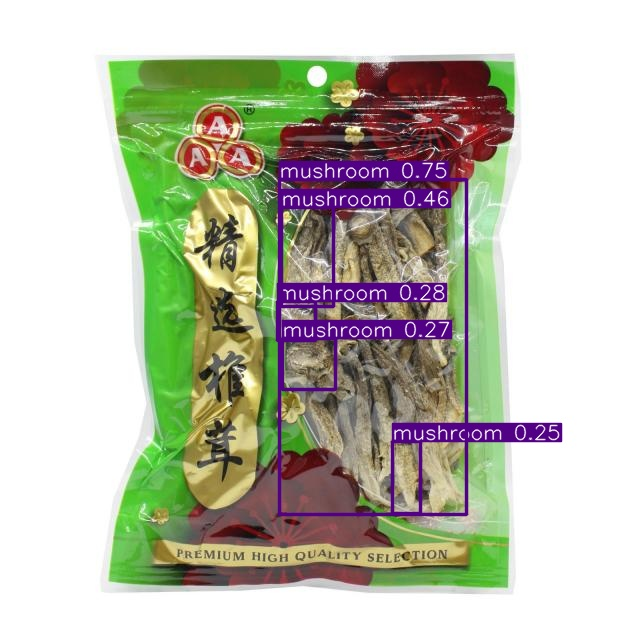

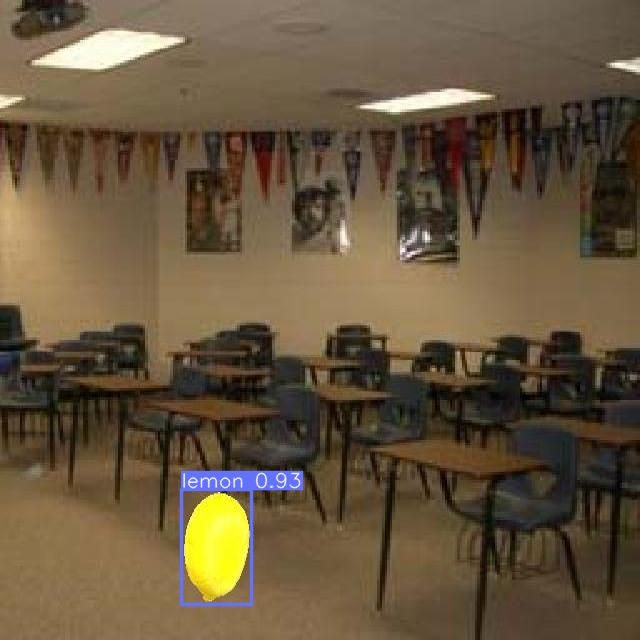

In [ ]:
import glob
from IPython.display import Image, display
import random

image_paths = glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')
random_image_paths = random.sample(image_paths, 5)

for image_path in random_image_paths:
      display(Image(filename=image_path, width=600))
      print("\n")

## Deploy model on Roboflow

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv8 weights.

To upload model weights, add the following code to the “Inference with Custom Model” section in the aforementioned notebook:

In [ ]:
project = rf.workspace("ingredients-bloos").project("ingredient-detection")

project.version(5).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train7/")

loading Roboflow workspace...
loading Roboflow project...
An error occured when getting the model upload URL: This version already has a trained model. Please generate and train a new version in order to upload model to Roboflow.


In [ ]:
#Run inference on your model on a persistant, auto-scaling, cloud API

#load model
model = project.version(5).model

#choose random test set image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

## 🏆 Congratulations

### Learning Resources

Roboflow has produced many resources that you may find interesting as you advance your knowledge of computer vision:

- [Roboflow Notebooks](https://github.com/roboflow/notebooks): A repository of over 20 notebooks that walk through how to train custom models with a range of model types, from YOLOv7 to SegFormer.
- [Roboflow YouTube](https://www.youtube.com/c/Roboflow): Our library of videos featuring deep dives into the latest in computer vision, detailed tutorials that accompany our notebooks, and more.
- [Roboflow Discuss](https://discuss.roboflow.com/): Have a question about how to do something on Roboflow? Ask your question on our discussion forum.
- [Roboflow Models](https://roboflow.com): Learn about state-of-the-art models and their performance. Find links and tutorials to guide your learning.

### Convert data formats

Roboflow provides free utilities to convert data between dozens of popular computer vision formats. Check out [Roboflow Formats](https://roboflow.com/formats) to find tutorials on how to convert data between formats in a few clicks.

### Connect computer vision to your project logic

[Roboflow Templates](https://roboflow.com/templates) is a public gallery of code snippets that you can use to connect computer vision to your project logic. Code snippets range from sending emails after inference to measuring object distance between detections.